In [1]:
!pip install polars
!pip install pandas
!pip install numpy
!pip install pyarrow
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from time import time
import polars as pl
import pandas as pd


In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi

kg_api = KaggleApi()
kg_api.authenticate()

In [4]:
# ⬇️ Download Dataset from Kaggle
# kg_api.dataset_download_cli('mkechinov/ecommerce-behavior-data-from-multi-category-store')

In [5]:
# from zipfile import ZipFile
#
# with ZipFile(r'.\datasets\ecommerce-behavior-data-from-multi-category-store.zip', 'r') as zipref:
#     zipref.extractall()

In [27]:
%%time
start = time()
dfp = pd.read_csv(r".\datasets\2019-Nov-1M.csv", )
pandas_read_time = time() - start
print(f"Reading a {len(dfp)} Dataframe with Polars took: {round(pandas_read_time,4)}s")

Reading a 1000000 Dataframe with Polars took: 0.9461s
CPU times: total: 344 ms
Wall time: 946 ms


In [28]:
# %%time
start = time()
df = pl.read_csv(r".\datasets\2019-Nov-1M.csv")
polars_read_time = time() - start
print(f"Reading a {len(df)} Dataframe with Polars took: {round(polars_read_time,4)}s")

Reading a 1000000 Dataframe with Polars took: 0.1075s


In [29]:
# Reading Time comparison between Pandas and Polars with a 1M CSV File with 9 columns

if pandas_read_time > polars_read_time:
    print (f"Polars has been x{round(pandas_read_time/polars_read_time,2)} times faster than Pandas")
else:
    print (f"Pandas has been x{round(polars_read_time/pandas_read_time,2)} times faster than Polars")

Polars has been x8.8 times faster than Pandas


In [23]:
df.shape

(1000000, 9)

In [12]:
df.head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:…","""view""",1003461,2053013555631882655,"""electronics.sm…","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-…"
"""2019-11-01 00:…","""view""",5000088,2053013566100866035,"""appliances.sew…","""janome""",293.65,530496790,"""8e5f4f83-366c-…"
"""2019-11-01 00:…","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-…"
"""2019-11-01 00:…","""view""",3601530,2053013563810775923,"""appliances.kit…","""lg""",712.87,518085591,"""3bfb58cd-7892-…"
"""2019-11-01 00:…","""view""",1004775,2053013555631882655,"""electronics.sm…","""xiaomi""",183.27,558856683,"""313628f1-68b8-…"


In [13]:
df.dtypes

[Utf8, Utf8, Int64, Int64, Utf8, Utf8, Float64, Int64, Utf8]

To select specific rows using index numbers, you can use

For example, through this syntax you can select the first row with all the columns of the DataFrame
```
df[0,:]
```
If you need to specify a range of rows, you can use the following command:
```
df[0:10,:]
```
In this way you are able to select the DataFrame's first 10 rows

In [47]:
df[0:10,[2,4]]

product_id,category_code
i64,str
1003461,"""electronics.sm…"
5000088,"""appliances.sew…"
17302664,null
3601530,"""appliances.kit…"
1004775,"""electronics.sm…"
1306894,"""computers.note…"
1306421,"""computers.note…"
15900065,null
12708937,null


In [49]:
# You can specify column selection by columns' number or by columns' name

# Selection by name
print(df[:10, ["event_time","price"]])

# Selection by number
print(df[:10, [0,6]])

shape: (10, 2)
┌─────────────────────────┬────────┐
│ event_time              ┆ price  │
│ ---                     ┆ ---    │
│ str                     ┆ f64    │
╞═════════════════════════╪════════╡
│ 2019-11-01 00:00:00 UTC ┆ 489.07 │
│ 2019-11-01 00:00:00 UTC ┆ 293.65 │
│ 2019-11-01 00:00:01 UTC ┆ 28.31  │
│ 2019-11-01 00:00:01 UTC ┆ 712.87 │
│ …                       ┆ …      │
│ 2019-11-01 00:00:01 UTC ┆ 514.56 │
│ 2019-11-01 00:00:02 UTC ┆ 30.86  │
│ 2019-11-01 00:00:02 UTC ┆ 72.72  │
│ 2019-11-01 00:00:02 UTC ┆ 732.07 │
└─────────────────────────┴────────┘
shape: (10, 2)
┌─────────────────────────┬────────┐
│ event_time              ┆ price  │
│ ---                     ┆ ---    │
│ str                     ┆ f64    │
╞═════════════════════════╪════════╡
│ 2019-11-01 00:00:00 UTC ┆ 489.07 │
│ 2019-11-01 00:00:00 UTC ┆ 293.65 │
│ 2019-11-01 00:00:01 UTC ┆ 28.31  │
│ 2019-11-01 00:00:01 UTC ┆ 712.87 │
│ …                       ┆ …      │
│ 2019-11-01 00:00:01 UTC ┆ 514.56 │
│ 2019-1

In [51]:
# Filtering similar to Pandas syntax
start = time()
df.filter(df['price'] > 100)
filtering_exec_time = time() - start


start = time()
df.filter(pl.col("price") > 100)
filtering_exec_time_ = time() - start

print(f"First filtering method: {filtering_exec_time}")
print(f"Second filtering method: {filtering_exec_time_}")

First filtering method: 0.06715798377990723
Second filtering method: 0.05351567268371582


In [54]:
%%time
df.with_columns(
    [(pl.col("price") * 100).alias("price_x_100")]
).head()

CPU times: total: 0 ns
Wall time: 3 ms


event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_x_100
str,str,i64,i64,str,str,f64,i64,str,f64
"""2019-11-01 00:…","""view""",1003461,2053013555631882655,"""electronics.sm…","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-…",48907.0
"""2019-11-01 00:…","""view""",5000088,2053013566100866035,"""appliances.sew…","""janome""",293.65,530496790,"""8e5f4f83-366c-…",29365.0
"""2019-11-01 00:…","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-…",2831.0
"""2019-11-01 00:…","""view""",3601530,2053013563810775923,"""appliances.kit…","""lg""",712.87,518085591,"""3bfb58cd-7892-…",71287.0
"""2019-11-01 00:…","""view""",1004775,2053013555631882655,"""electronics.sm…","""xiaomi""",183.27,558856683,"""313628f1-68b8-…",18327.0


In [57]:
%%time
df.filter(pl.col("price") > 1000)

CPU times: total: 15.6 ms
Wall time: 10.1 ms


event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:…","""view""",1004237,2053013555631882655,"""electronics.sm…","""apple""",1091.33,565404816,"""d9cf0ac4-c3ec-…"
"""2019-11-01 00:…","""view""",1005116,2053013555631882655,"""electronics.sm…","""apple""",1013.86,532647354,"""d2d3d2c6-631d-…"
"""2019-11-01 00:…","""view""",1004241,2053013555631882655,"""electronics.sm…","""apple""",1173.6,565404816,"""d9cf0ac4-c3ec-…"
"""2019-11-01 00:…","""view""",1004237,2053013555631882655,"""electronics.sm…","""apple""",1091.33,519277091,"""62fadce6-aa4a-…"
"""2019-11-01 00:…","""view""",1307012,2053013558920217191,"""computers.note…","""apple""",2342.15,530857208,"""c69f9c63-7098-…"
"""2019-11-01 00:…","""view""",1307519,2053013558920217191,"""computers.note…","""acer""",1209.55,536638900,"""e1e8125d-da26-…"
"""2019-11-01 00:…","""view""",1005116,2053013555631882655,"""electronics.sm…","""apple""",1013.86,544896141,"""80a43be5-1e98-…"
"""2019-11-01 00:…","""view""",1306571,2053013558920217191,"""computers.note…","""acer""",2312.8,530857208,"""c69f9c63-7098-…"
"""2019-11-01 00:…","""view""",5100797,2053013553341792533,"""electronics.cl…","""garmin""",2239.44,521368162,"""375da15e-023b-…"


In [59]:
%%time
df.filter(pl.col('brand').is_in(['apple', 'samsung', 'motorola'])).head()

CPU times: total: 31.2 ms
Wall time: 40 ms


event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:…","""view""",1004258,2053013555631882655,"""electronics.sm…","""apple""",732.07,532647354,"""d2d3d2c6-631d-…"
"""2019-11-01 00:…","""view""",4600658,2053013563944993659,"""appliances.kit…","""samsung""",411.83,526595547,"""aab33a9a-29c3-…"
"""2019-11-01 00:…","""view""",1005115,2053013555631882655,"""electronics.sm…","""apple""",949.47,562079864,"""0fe64462-83eb-…"
"""2019-11-01 00:…","""view""",1002544,2053013555631882655,"""electronics.sm…","""apple""",458.28,549256216,"""dcbdc6e4-cd49-…"
"""2019-11-01 00:…","""cart""",1005014,2053013555631882655,"""electronics.sm…","""samsung""",503.09,533326659,"""6b928be2-2bce-…"


In [67]:
start = time()
df.sample(5)
print(f"Time for extracting 5 random samples {round(time()-start, 2)}s")

start = time()
df.sample(5).to_pandas()
print(f"Time for extracting 5 random samples and convert into pandas {round(time()-start, 2)}s")

Time for extracting 5 random samples 0.01s
Time for extracting 5 random samples and convert into pandas 0.01s


In [70]:
#Operations
start = time()
df.select([
    pl.col('product_id').n_unique()
])
print(f"Time to get the number of unique values {round(time()-start, 2)}s")

Time to get the number of unique values 0.01s


In [77]:
start = time()
df.select([
    pl.col('price').min().alias('min'),
    pl.col('price').mean().alias('mean'),
    pl.col('price').median().alias('median'),
    pl.col('price').max().alias('max'),
    pl.col('price').std().alias('std')
])
print(f"Time to execute a series of operations {round(time() - start, 2)}s")

Time to execute a series of operations 0.01s


In [81]:
df.select([
    pl.col('price')
]).describe()

describe,price
str,f64
"""count""",1e6
"""null_count""",0.0
"""mean""",292.181443
"""std""",347.585961
"""min""",0.0
"""max""",2574.07
"""median""",172.18
"""25%""",69.72
"""75%""",361.97


Time to execute a select on the polars Dataframe 0.0s
Time to show an histogram of the previous selected series 0.11s


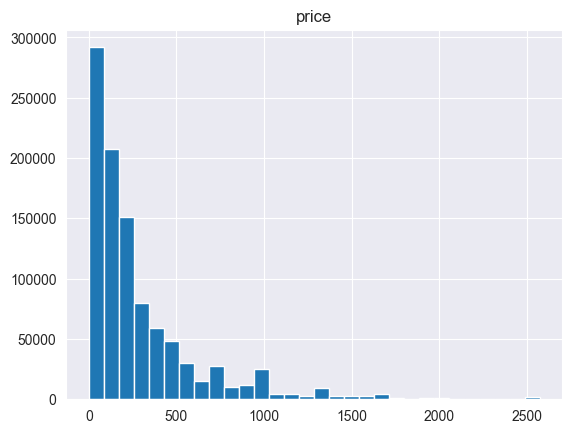

In [84]:
start = time()
price = df.select([
    pl.col('price')
])
print(f"Time to execute a select on the polars Dataframe {round(time()-start, 2)}s")

start = time()
price.to_pandas().hist(bins=30)
print(f"Time to show an histogram of the previous selected series {round(time()-start, 2)}s")